In [193]:
import pyoncoprint
import pandas as pd
import seaborn as sns

In [89]:
test = pd.read_csv("../../../../data/tcga/tcga.tsv", sep='\t')

In [90]:
test

,track_name,track_type,TCGA-75-5122,TCGA-91-6836,TCGA-55-7576,TCGA-MN-A4N5,TCGA-05-4250,TCGA-44-7661,TCGA-55-8094,TCGA-55-7910,...,TCGA-97-7547,TCGA-97-7552,TCGA-97-7553,TCGA-97-7937,TCGA-97-8171,TCGA-97-8172,TCGA-97-8175,TCGA-97-8552,TCGA-99-AA5R,TCGA-99-7458
0,KRAS,CNA,amp_rec,amp_rec,amp_rec,amp_rec,amp_rec,amp_rec,amp_rec,amp_rec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HRAS,CNA,NaN,Deep Deletion,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BRAF,CNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RAF1,CNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MAP3K1,CNA,NaN,NaN,Amplification,Amplification,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,RAB25,STRUCTURAL_VARIANT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,KRAS,HEATMAP MRNA_EXPRESSION Z-SCORE,5.9959,10.8738,2.2105,2.0675,5.3943,3.2589,12.8384,0.7326,...,0.237000,0.64290,-0.619000,-0.251000,-0.825700,1.787900,0.469300,-0.826200,-1.120700,0.641100
131,HRAS,HEATMAP MRNA_EXPRESSION Z-SCORE,-0.8059,-1.2021,-0.5957,0.3468,-0.4467,0.4396,0.215,-0.5369,...,-0.587200,-1.05410,-1.123700,-0.418100,-0.683400,-0.233000,0.628300,-0.285700,0.066300,-0.833300
132,BRAF,HEATMAP MRNA_EXPRESSION Z-SCORE,-0.6797,5.2897,1.1695,-0.5823,0.6957,0.3878,-0.2288,6.457,...,0.835600,0.07880,-0.465100,2.075900,7.030900,0.733200,0.305000,-0.167900,-0.147600,2.304200


In [57]:
train_clusters = pd.read_csv("../../../../data/expression/processed/train/V4/IO-Atlas-NSCLC-CLUSTERS-TRAIN-2023-08-10-V4.tsv",
                             sep='\t',
                             header=None)

test_clusters = pd.read_csv("../../../../data/expression/processed/test/V4/IO-Atlas-NSCLC-CLUSTERS-TEST-2023-08-10-V4.tsv",
                             sep='\t',
                             header=None)

clusters = pd.concat([train_clusters, test_clusters])

clusters = clusters.sort_values(1)

clusters.columns = ["rna_sample", "response_cluster"]

clusters = clusters.set_index("rna_sample")

,response_cluster,histology,stage,line_of_therapy,prior_platinum,prior_tki
rna_sample,,,,,,
SU2CLC-DFC-1017-T2,NSCLC-Resistant-Cluster-0,Adeno,4.0,8.0,1.0,0.0
SU2CLC-MGH-1150-T1,NSCLC-Resistant-Cluster-0,Squamous,4.0,3.0,1.0,0.0
SU2CLC-MDA-1562-T1,NSCLC-Resistant-Cluster-0,Adeno,4.0,3.0,1.0,0.0
SU2CLC-DFC-DF0668-T1,NSCLC-Resistant-Cluster-0,Adeno,4.0,3.0,1.0,0.0
SU2CLC-MDA-1444-T1,NSCLC-Resistant-Cluster-0,Squamous,4.0,3.0,1.0,0.0
...,...,...,...,...,...,...
SU2CLC-COL-1005-T1,NSCLC-Response-Cluster-2,Other,NaN,1.0,0.0,0.0
SU2CLC-MGH-1387-T1,NSCLC-Response-Cluster-2,Adeno,3.0,2.0,1.0,0.0
SU2CLC-MGH-1412-T1,NSCLC-Response-Cluster-2,Adeno,4.0,1.0,0.0,0.0


In [75]:
df = pd.read_csv('../../../../data/su2c-merge-master.tsv',
                 sep='\t',
                 index_col=0)

In [77]:
tbl = df.reindex(df["Harmonized_SU2C_RNA_Tumor_Sample_ID_v2"].dropna().index).set_index("Harmonized_SU2C_RNA_Tumor_Sample_ID_v2")

In [93]:
mutations = \
['APC_MUT',
 'ARID1A_MUT',
 'ATM_MUT',
 'BRAF_MUT',
 'CDKN2A_MUT',
 'COL5A2_MUT',
 'EGFR_MUT',
 'FAT1_MUT',
 'KEAP1_MUT',
 'KMT2C_MUT',
 'KMT2D_MUT',
 'KRAS_MUT',
 'MGA_MUT',
 'NF1_MUT',
 'NFE2L2_MUT',
 'NOTCH1_MUT',
 'PIK3CA_MUT',
 'PLXNB2_MUT',
 'RBM10_MUT',
 'SETD2_MUT',
 'SMARCA4_MUT',
 'STK11_MUT',
 'TP53_MUT']

In [91]:
tbl.index.map

,WES_Cohort_1,WES_Cohort_2,WES_All,RNA_Cohort_1,RNA_Cohort_2,RNA_All,Institution,Harmonized_SU2C_Participant_ID_v2,Harmonized_SU2C_WES_Tumor_Sample_ID_v2,Harmonized_SU2C_WES_Normal_Sample_ID_v2,...,hN3_ZI,hN5_ZI,hDC1_ZI,hDC2_ZI,hDC3_ZI,hpDC_ZI,hMast1_ZI,hMast2_ZI,hT1_ZI,hB_ZI
Harmonized_SU2C_RNA_Tumor_Sample_ID_v2,,,,,,,,,,,,,,,,,,,,,
SU2CLC-CLE-NIVO10-T1,NaN,NaN,NaN,1.0,NaN,1.0,Cleveland Clinic,SU2CLC-CLE-NIVO10,NaN,NaN,...,-1.628139,-0.734098,-1.319504,-1.623890,-3.014243,-1.367851,-3.070258,-1.403527,-2.090289,-1.497674
SU2CLC-CLE-NIVO18-T1,1.0,NaN,1.0,1.0,NaN,1.0,Cleveland Clinic,SU2CLC-CLE-NIVO18,SU2CLC-CLE-NIVO18-T1,SU2CLC-CLE-NIVO18-N1,...,-0.722902,-0.381433,-0.283341,-1.638975,-0.397212,-0.145566,0.997473,-0.732677,-0.159027,-0.176729
SU2CLC-CLE-NIVO19-T1,1.0,NaN,1.0,1.0,NaN,1.0,Cleveland Clinic,SU2CLC-CLE-NIVO19,SU2CLC-CLE-NIVO19-T1,SU2CLC-CLE-NIVO19-N1,...,0.414281,-0.651719,-0.013068,0.592631,0.504079,0.551709,-0.312533,0.795462,0.512162,0.489272
SU2CLC-CLE-NIVO2-T1,NaN,NaN,NaN,1.0,NaN,1.0,Cleveland Clinic,SU2CLC-CLE-NIVO2,NaN,NaN,...,0.802809,-0.332503,0.312384,0.651996,0.823568,1.290402,0.151119,1.524649,1.160909,0.155196
SU2CLC-CLE-NIVO20-T1,NaN,NaN,NaN,1.0,NaN,1.0,Cleveland Clinic,SU2CLC-CLE-NIVO20,NaN,NaN,...,-0.529214,-0.571519,-0.604111,-0.802896,0.040392,0.199211,0.340869,-1.427449,1.800060,0.516564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SU2CLC-UCD-1137-T1,NaN,NaN,NaN,NaN,1.0,1.0,UC Davis,SU2CLC-UCD-1137,NaN,NaN,...,-0.359548,-0.411531,0.627847,-0.372759,0.977810,1.340060,-0.373209,-0.229486,1.700179,2.490339
SU2CLC-UCD-1142-T1,NaN,1.0,1.0,NaN,1.0,1.0,UC Davis,SU2CLC-UCD-1142,SU2CLC-UCD-1142-T1,SU2CLC-UCD-1142-N1,...,0.832927,0.494088,0.746022,0.063519,0.244336,0.289744,0.360659,-0.707999,0.613052,-0.565586
SU2CLC-UCD-1143-T1,NaN,NaN,NaN,NaN,1.0,1.0,UC Davis,SU2CLC-UCD-1143,NaN,NaN,...,1.108914,-0.273575,1.171359,1.068969,0.082321,0.501416,0.660032,0.912082,0.342980,-0.217569


In [88]:
tbl[select_cols].max(axis=0)

APC_MUT        1.0
ARID1A_MUT     1.0
ATM_MUT        1.0
BRAF_MUT       1.0
CDKN2A_MUT     1.0
COL5A2_MUT     1.0
EGFR_MUT       1.0
FAT1_MUT       1.0
KEAP1_MUT      1.0
KMT2C_MUT      1.0
KMT2D_MUT      1.0
KRAS_MUT       1.0
MGA_MUT        1.0
NF1_MUT        1.0
NFE2L2_MUT     1.0
NOTCH1_MUT     1.0
PIK3CA_MUT     1.0
PLXNB2_MUT     1.0
RBM10_MUT      1.0
SETD2_MUT      1.0
SMARCA4_MUT    1.0
STK11_MUT      1.0
TP53_MUT       1.0
dtype: float64

In [96]:
for sample in clusters.index.values:
    
    clusters.loc[sample, "histology"] = tbl1.loc[sample, "Histology_Harmonized"]
    clusters.loc[sample, "stage"] = tbl1.loc[sample, "Initial_Stage"]
    clusters.loc[sample, "line_of_therapy"] = tbl1.loc[sample, "Line_of_Therapy"]
    clusters.loc[sample, "prior_platinum"] = tbl1.loc[sample, "Prior_Platinum"]
    clusters.loc[sample, "prior_tki"] = tbl1.loc[sample, "Prior_TKI"]
    
    if "Response" in clusters.loc[sample, "response_cluster"]:
        clusters.loc[sample, "response"] = 1
        
    else:
        clusters.loc[sample, "response"] = 0
        
    
    for mutation in mutations:
        clusters.loc[sample, mutation] = tbl.loc[sample, mutation]
    
clusters

,response_cluster,histology,stage,line_of_therapy,prior_platinum,prior_tki,APC_MUT,ARID1A_MUT,ATM_MUT,BRAF_MUT,...,NFE2L2_MUT,NOTCH1_MUT,PIK3CA_MUT,PLXNB2_MUT,RBM10_MUT,SETD2_MUT,SMARCA4_MUT,STK11_MUT,TP53_MUT,response
rna_sample,,,,,,,,,,,,,,,,,,,,,
SU2CLC-DFC-1017-T2,NSCLC-Resistant-Cluster-0,Adeno,4.0,8.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
SU2CLC-MGH-1150-T1,NSCLC-Resistant-Cluster-0,Squamous,4.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
SU2CLC-MDA-1562-T1,NSCLC-Resistant-Cluster-0,Adeno,4.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
SU2CLC-DFC-DF0668-T1,NSCLC-Resistant-Cluster-0,Adeno,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
SU2CLC-MDA-1444-T1,NSCLC-Resistant-Cluster-0,Squamous,4.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SU2CLC-COL-1005-T1,NSCLC-Response-Cluster-2,Other,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
SU2CLC-MGH-1387-T1,NSCLC-Response-Cluster-2,Adeno,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
SU2CLC-MGH-1412-T1,NSCLC-Response-Cluster-2,Adeno,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [229]:
from scipy.stats import kruskal, mannwhitneyu

tmp = clusters[clusters["response"] == 1.0].groupby("response_cluster")["line_of_therapy"]

print(tmp.groups.keys())

kruskal(*[list(tmp.get_group(x).values) for x in tmp.groups])

print(mannwhitneyu(tmp.get_group('NSCLC-Response-Cluster-0').values, tmp.get_group('NSCLC-Response-Cluster-2').values))

dict_keys(['NSCLC-Response-Cluster-0', 'NSCLC-Response-Cluster-1', 'NSCLC-Response-Cluster-2'])
MannwhitneyuResult(statistic=125.0, pvalue=0.0024921148050864317)


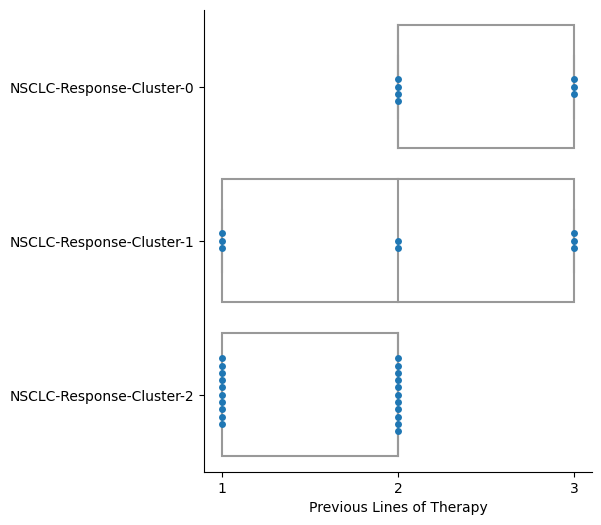

In [258]:
fig, ax = plt.subplots(1, 1, figsize=(5,6))

sns.swarmplot(y="response_cluster", x="line_of_therapy", data=clusters[clusters["response"] == 1.0], ax=ax)
sns.boxplot(y="response_cluster", x="line_of_therapy", data=clusters[clusters["response"] == 1.0], color="white", ax=ax)

ax.set_ylabel("")
ax.set_xticks([1, 2, 3])
ax.set_xlabel("Previous Lines of Therapy")

sns.despine()

plt.savefig("../../../../figures/su2c/distribution-of-lines-of-treatment-across-response-group.svg",
            format='svg', 
            bbox_inches='tight')

In [98]:
clusters["response_cluster"].unique()

array(['NSCLC-Resistant-Cluster-0', 'NSCLC-Resistant-Cluster-1',
       'NSCLC-Response-Cluster-0', 'NSCLC-Response-Cluster-1',
       'NSCLC-Response-Cluster-2'], dtype=object)

In [200]:
from scipy.stats import chisquare
def chisquare_response_cluster_analysis(feature):
    response_clusters = clusters[clusters["response"] == 1.0]
    expected_frequencies = response_clusters["response_cluster"].value_counts() / response_clusters["response_cluster"].count()
    
    groups = response_clusters.groupby(feature)["response_cluster"].value_counts()
    
    for group in groups.index.get_level_values(feature).unique():
        stat, pval = chisquare(groups.loc[group, :].reindex(expected_frequencies.index).values,
                  expected_frequencies.values * groups.loc[group, :].reindex(expected_frequencies.index).sum())
        
        
        if pval < 0.05:
            print("\n\n#####################  SIGNIFICANT  ######################")
            print(f"Feature: {group} Chi-squared pval: {pval:.3f}")
            print("#####################  SIGNIFICANT  ######################\n\n")
            
        else:
            print(f"Feature: {group} Chi-squared pval: {pval:.3f}")

#
# Histology Analysis
#
chisquare_response_cluster_analysis("histology")



    
#
# Stage
# 
chisquare_response_cluster_analysis("stage")


Feature: Adeno Chi-squared pval: 0.336
Feature: LC-NE Chi-squared pval: nan
Feature: Other Chi-squared pval: nan


#####################  SIGNIFICANT  ######################
Feature: Squamous Chi-squared pval: 0.028
#####################  SIGNIFICANT  ######################


Feature: 1.0 Chi-squared pval: nan
Feature: 2.0 Chi-squared pval: nan
Feature: 3.0 Chi-squared pval: 0.797
Feature: 4.0 Chi-squared pval: 0.571


In [188]:
tmp

,histology,response_cluster,count
1,Adeno,NSCLC-Response-Cluster-0,0.833333
7,Squamous,NSCLC-Response-Cluster-0,0.166667
2,Adeno,NSCLC-Response-Cluster-1,0.428571
6,Squamous,NSCLC-Response-Cluster-1,0.571429
0,Adeno,NSCLC-Response-Cluster-2,0.950000
8,Squamous,NSCLC-Response-Cluster-2,0.050000


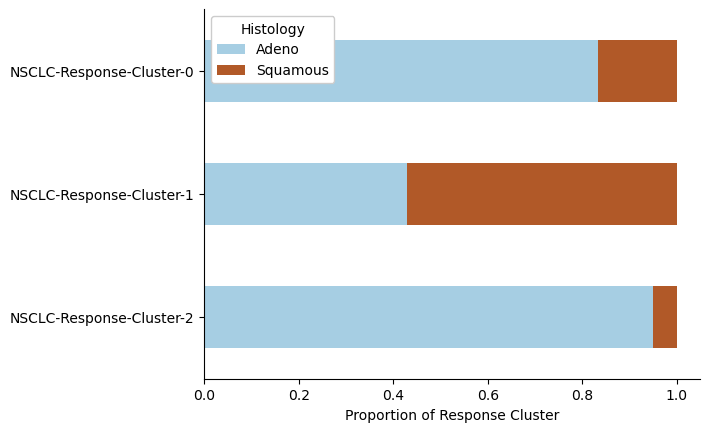

In [255]:
tmp =  histology_group.reset_index().copy()
tmp = tmp[tmp["histology"].isin(["Adeno", "Squamous"])]

for cluster, rows in tmp.groupby("response_cluster"):
    tmp.loc[tmp["response_cluster"] == cluster, "count"] /= rows["count"].sum()

tmp = tmp.sort_values("response_cluster")

tmp.pivot(index="response_cluster", 
          columns="histology", 
          values="count").sort_index(ascending=False).plot(kind="barh", 
                                                           stacked=True, 
                                                           mark_right=True,
                                                           colormap="Paired")

plt.xlabel("Proportion of Response Cluster")
plt.ylabel("")

legend = plt.legend(facecolor="white", framealpha=1, title="Histology")

sns.despine()

plt.savefig("../../../../figures/su2c/distribution-of-histology-across-response-group.svg",
            format='svg', 
            bbox_inches='tight')

In [5]:
df_oncoprint = df[df['track_type'].isin(['MUTATIONS', 'CNA', 'STRUCTURAL_VARIANT', 'PROTEIN', 'MRNA'])].drop(columns=['track_type']).set_index('track_name').fillna('')

# Fix broken names
df_oncoprint.replace('amp_rec', 'Amplification', inplace=True)
df_oncoprint.replace('homdel_rec', 'Deep Deletion', inplace=True)
df_oncoprint.replace('splice', 'Splice Mutation (putative driver)', inplace=True)
df_oncoprint.replace('splice_rec', 'Splice Mutation (putative passenger)', inplace=True)
df_oncoprint.replace('sv', 'Structural Variant (putative driver)', inplace=True)
df_oncoprint.replace('sv_rec', 'Structural Variant (putative passenger)', inplace=True)

In [7]:
df_all_heatmaps = df[df['track_type'].str.startswith('HEATMAP')].set_index('track_name').drop(columns=['track_type']).astype(float)
df_all_heatmaps

,TCGA-75-5122,TCGA-91-6836,TCGA-55-7576,TCGA-MN-A4N5,TCGA-05-4250,TCGA-44-7661,TCGA-55-8094,TCGA-55-7910,TCGA-99-8028,TCGA-55-7283,...,TCGA-97-7547,TCGA-97-7552,TCGA-97-7553,TCGA-97-7937,TCGA-97-8171,TCGA-97-8172,TCGA-97-8175,TCGA-97-8552,TCGA-99-AA5R,TCGA-99-7458
track_name,,,,,,,,,,,,,,,,,,,,,
KRAS,5.9959,10.873800,2.210500,2.067500,5.394300,3.258900,12.838400,0.73260,0.711700,0.702600,...,0.237000,0.64290,-0.619000,-0.251000,-0.825700,1.787900,0.469300,-0.826200,-1.120700,0.641100
HRAS,-0.8059,-1.202100,-0.595700,0.346800,-0.446700,0.439600,0.215000,-0.53690,0.093400,-0.617200,...,-0.587200,-1.05410,-1.123700,-0.418100,-0.683400,-0.233000,0.628300,-0.285700,0.066300,-0.833300
BRAF,-0.6797,5.289700,1.169500,-0.582300,0.695700,0.387800,-0.228800,6.45700,-0.037600,0.155200,...,0.835600,0.07880,-0.465100,2.075900,7.030900,0.733200,0.305000,-0.167900,-0.147600,2.304200
Dicipivirus,NaN,1.818539,2.995816,3.148315,3.848246,3.184577,2.605129,2.89775,1.360822,4.783737,...,4.021537,4.94984,3.603823,4.322136,3.743562,3.596431,4.375761,3.974692,2.860782,3.933477


In [8]:
heatmaps = {
    'mRNA expression z-scores relative to diploid samples (RNA Seq V2 RSEM)': {
        'heatmap': df_all_heatmaps.iloc[:3],
        'cmap': 'RdBu_r',
        'vmin': -3,
        'vmax': 3
    },
    'Methylation (HM27 and HM450 merge)': {
        'heatmap': df_all_heatmaps.iloc[3:6],
        'cmap': 'Blues',
        'vmin': 0,
    },
    'Microbiome Signatures (log RNA Seq CPM)': {
        'heatmap': df_all_heatmaps.iloc[6:],
        'cmap': 'copper',
    },
}

In [9]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('jet')

annotations = {}

df_all_annotations = df[df['track_type'].isin(['CLINICAL'])].drop(columns=['track_type']).set_index('track_name')

# Mutation Spectrum
#
# As this contains multiple rows of numbers, PyOncoPrint creates a stacked bar plot
#
df_ms = df_all_annotations[df_all_annotations.index.str.startswith('Mutation spectrum')].fillna('0').astype(int)
df_ms.index = df_ms.index.map(lambda x: x.split(' ')[-1][1:-1])
annotations['Mutation spectrum'] = {
    'annotations': df_ms,
    'colors': {k: v for k, v in zip(df_ms.index, cmap(np.linspace(0, 1, df_ms.index.size, dtype=float)))},
    'order': 0,
}

# MSI MANTIS Score
#
# As this contains a single row of numbers, PyOncoPrint creates a bar plot
#
df_mms = df_all_annotations[df_all_annotations.index == 'MSI MANTIS Score'].fillna('0').astype(float)
annotations['MSI MANTIS Score'] = {
    'annotations': df_mms,
    'color': 'green',
    'order': 1,
}

# American Joint Committee on Cancer Tumor Stage Code
#
# As this contains a row of strings, PyOncoPrint creates a categorical heatmap
#
df_stagecode = df_all_annotations[df_all_annotations.index == 'American Joint Committee on Cancer Tumor Stage Code']
uniq_annots = sorted(pd.unique(df_stagecode.values.ravel()))
annotations['American Joint Committee on Cancer Tumor Stage Code'] = {
    'annotations': df_stagecode,
    'colors': {k: v for k, v in zip(uniq_annots, cmap(np.linspace(0, 1, len(uniq_annots), dtype=float)))},
    'order': 2
}

In [10]:
from matplotlib.patches import Polygon, Rectangle

mutation_markers = {
    "Amplification": dict(
        marker="fill",
        color="red",
        zindex=0
    ),
    "Deep Deletion": dict(
        marker="fill",
        color="blue",
        zindex=0
    ),
    "Splice Mutation (putative driver)": dict(
        marker="fill",
        color="darkorange",
        height=0.5,
        zindex=1
    ),
    "Splice Mutation (putative passenger)": dict(
        marker="fill",
        color="orange",
        height=0.5,
        zindex=1
    ),
    "Structural Variant (putative driver)": dict(
        marker="*",
        color="purple",
        lw=0,
        zindex=2
    ),
    "Structural Variant (putative passenger)": dict(
        marker="*",
        color="fuchsia",
        lw=0,
        zindex=2
    ),
    "Inframe Mutation (putative driver)": dict(
        marker="fill",
        color="brown",
        height=0.5,
        zindex=1
    ),
    "Missense Mutation (putative driver)": dict(
        marker=Polygon([[0, 0], [1, 1], [1, 0]]),
        color="green",
        linewidth=0,
        zindex=1
    ),
    "Missense Mutation (putative passenger)": dict(
        marker="fill",
        color="lime",
        height=0.5,
        zindex=1
    ),
    "Truncating mutation (putative driver)": dict(
        marker="fill",
        color="black",
        height=0.5,
        zindex=1
    ),
    "Truncating mutation (putative passenger)": dict(
        marker="fill",
        color="yellow",
        height=0.5,
        zindex=1
    ),
}


In [67]:
help(op.oncoprint)

Help on method oncoprint in module pyoncoprint:

oncoprint(markers, annotations={}, heatmaps={}, title='', gene_sort_method='default', sample_sort_method='default', figsize=[50, 20], topplot=True, rightplot=True, legend=True, cell_background='#dddddd', gap=0.3, ratio_template='{0:.0%}', **kwargs) method of pyoncoprint.OncoPrint instance



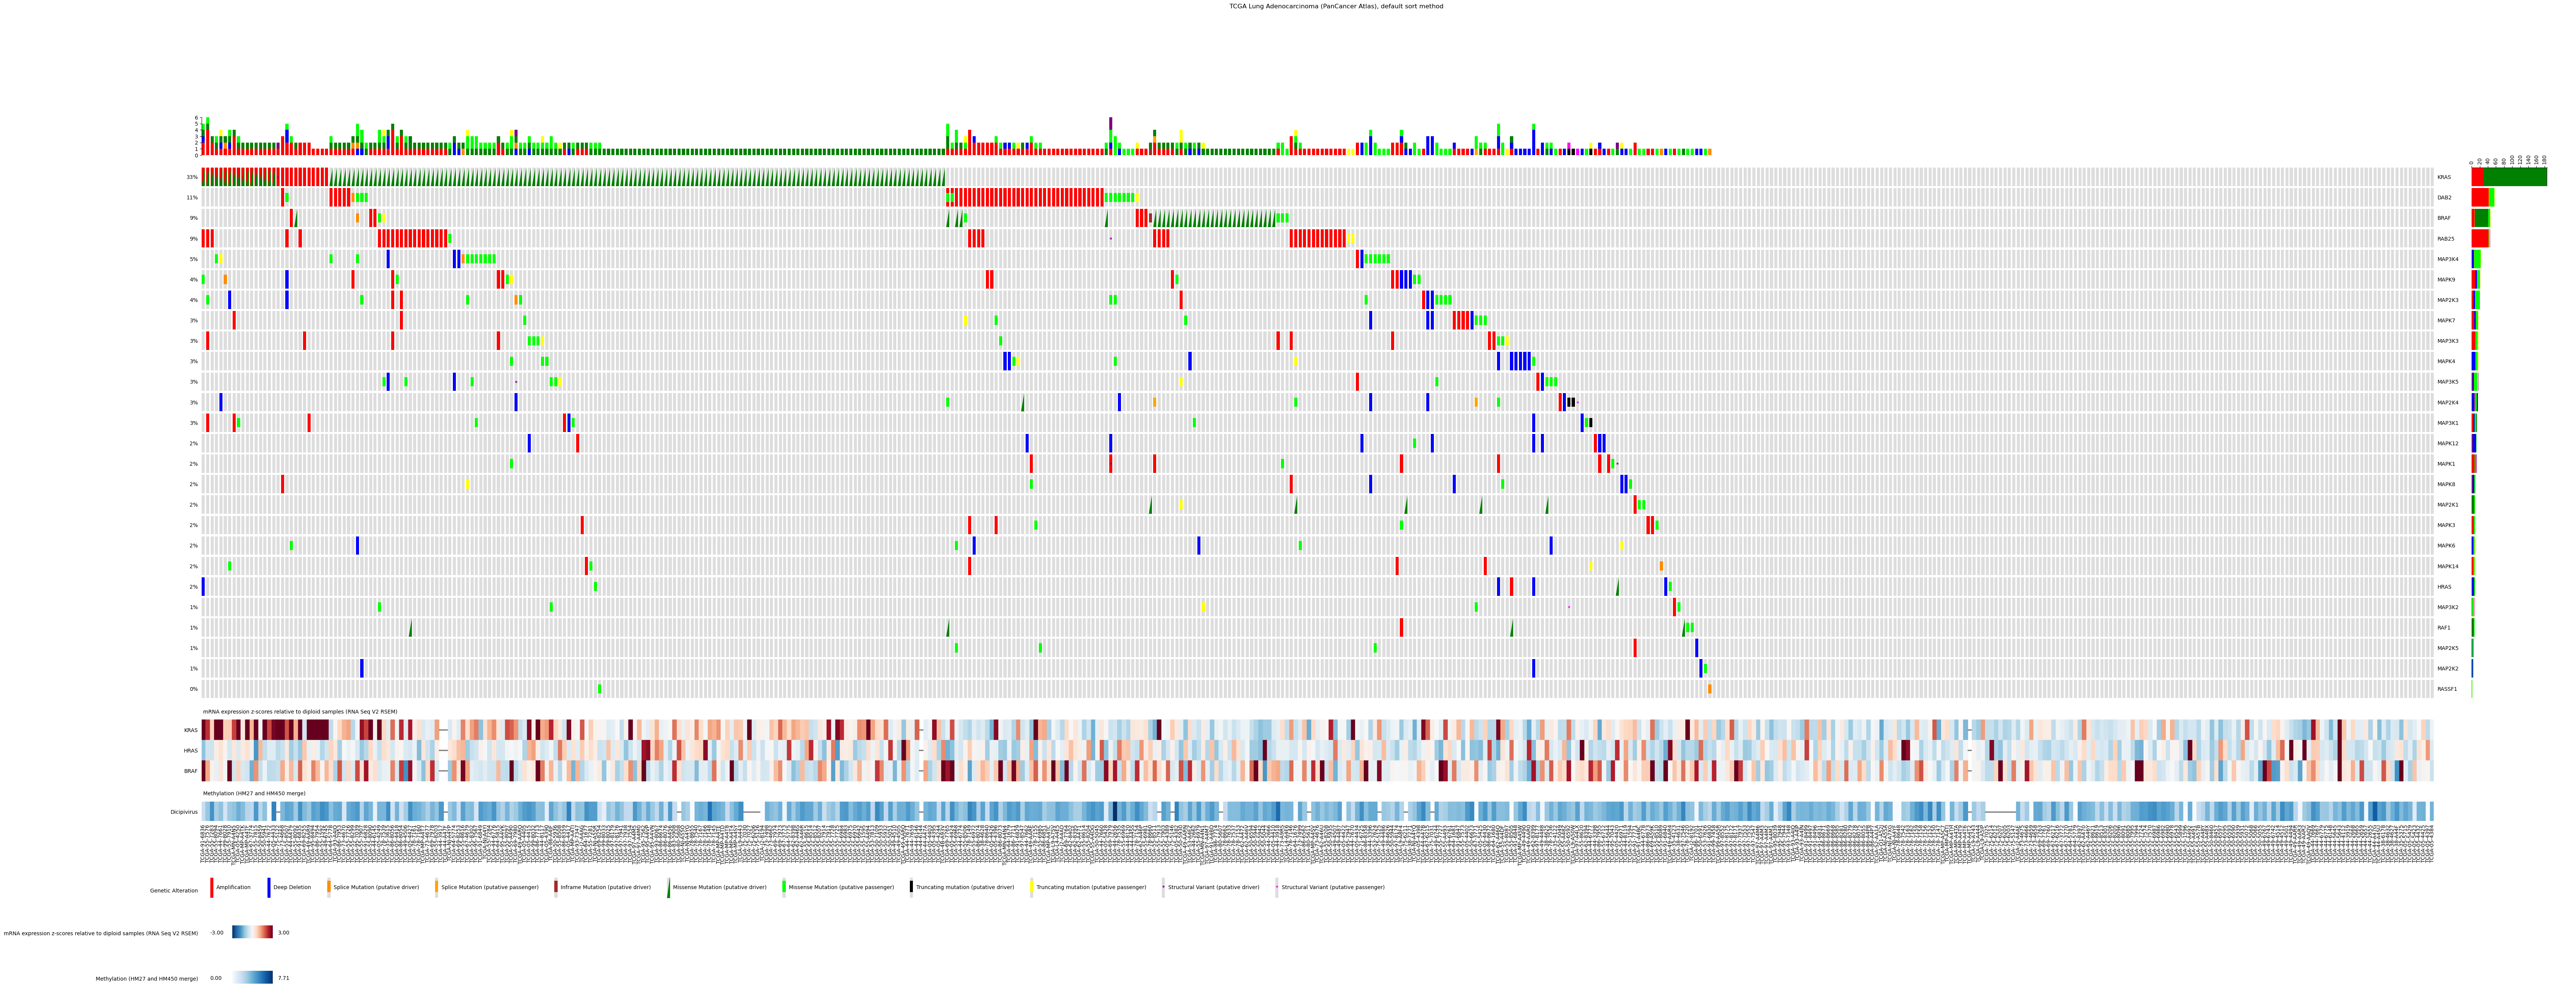

In [12]:
op = pyoncoprint.OncoPrint(df_oncoprint)

fig, axes = op.oncoprint(mutation_markers,
                         annotations=annotations,
                         heatmaps=heatmaps,
                         figsize=[80, 30],
                         gap=[0.3, 0.1],                     # gap between cells (ratio)
                         title="TCGA Lung Adenocarcinoma (PanCancer Atlas), default sort method",
                         topplot=True, 
                         rightplot=True, 
                         legend=True)

# return values: figure, (oncoprint_axis, oncoprint_dual_axis, axis_top_barplot, axis_right_barplot, axis_legend)
fig.patch.set_facecolor('white')